## To visualize sequence preference (relative efficiency) as sequence logo using logomaker

python 3 codes  
jupyter=1.0.0; pandas=1.1.5; matplotlib=3.3.1; numpy=1.19.4; ipython=7.19.0; logomaker=0.8;

In [1]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
get_ipython().run_line_magic('matplotlib', 'inline')

# For showing images
from IPython.display import Image

# Import Logomaker
import logomaker

### Sequence logos of sequence preference at -11 to +1 positions, from genome

In [2]:
# Load sequence logo values (relative efficiency), generated by <5-gnm-pref.R>
mtx_folder = "/Users/xxxx/Documents/Txn/3-TSS_sequence_library/11-gnm_anly/5-gnm/"

pol = 'WT'
grad = 'TZ'
mrdg_indv = 'mrgd'
mtx_name = grad +'_'+pol+'_'+mrdg_indv + '-medTSS-median_centered.csv'

pref = pd.read_csv(mtx_folder+mtx_name, index_col=0).reset_index()[['A','G','C','T']] # -11 to +9
pref

,A,G,C,T
0,-0.312624,1.657994,1.869986,-3.215356
1,1.103775,-0.316412,0.650258,-1.437621
2,4.410938,-1.302023,-1.670022,-1.438894
3,14.398222,0.244531,-6.363044,-8.279709
4,5.040771,6.118438,-6.351496,-4.807713
5,5.494787,2.713346,-4.251482,-3.956651
6,5.830659,-0.878819,-4.069899,-0.881941
7,1.733252,0.836269,4.482276,-7.051798
8,3.660549,3.512635,-4.275741,-2.897443
9,-5.210307,1.893817,4.235220,-0.918729


[Text(0, 0, '-11'),
 Text(1, 0, '-10'),
 Text(2, 0, '-9'),
 Text(3, 0, '-8'),
 Text(4, 0, '-7'),
 Text(5, 0, '-6'),
 Text(6, 0, '-5'),
 Text(7, 0, '-4'),
 Text(8, 0, '-3'),
 Text(9, 0, '-2'),
 Text(10, 0, '-1'),
 Text(11, 0, '+1')]

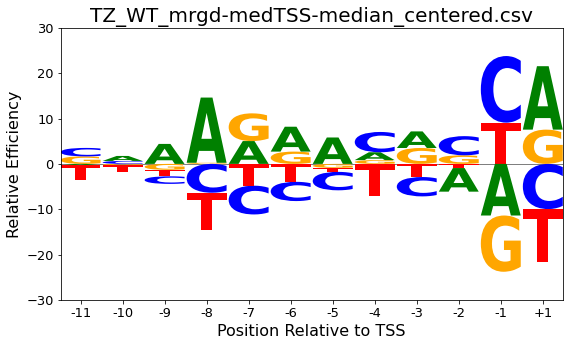

In [3]:
# sequence logo between -11 to +1, so that can compared to that from libraries
star = 0 # -11
stop = 12 # +1
pos_label = ['-11','-10','-9','-8','-7','-6','-5','-4','-3','-2','-1','+1','+2','+3','+4','+5','+6','+7','+8','+9']\
            [star:stop]

fig, ax = plt.subplots(1,1, figsize=[9/12*len(pos_label),5])
logo = logomaker.Logo(pref.iloc[star:stop,:].reset_index()[['A','G','C','T']], ax=ax)
logo.style_glyphs_below(flip=False,) # if fliping logo below baseline
ax.set_title(mtx_name, fontsize=20)
ax.set_ylabel(r'Relative Efficiency', fontsize=16)
ax.set_xlabel(r'Position Relative to TSS', fontsize=16)
ax.set_ylim(-30, 30)
ax.yaxis.set_tick_params(labelsize=13)
ax.set_xticks(range(0, len(pos_label)))
ax.set_xticklabels(pos_label, fontsize=13)

#plt.savefig((mtx_folder+mtx_name).replace(".csv",".pdf"))